# **Exploratory Data Analysis on Framingham Heart Study**


## **Content Outlines**

1.   Introduction 

2.   Data Description

    *   Data Dictionary
    *   Data Overview

3.   Data Cleaning

    *   Finding and Handling Null values
    *   Finding and Handling outliers   

4.   Data Exploration

    *   Grouping and Aggregations
    *   Visualizations   

5.   Conclusion

6. References



## **1. Introduction**

This dataser is from a cardiovascular research which has been taken on the residents of Framingham city in Massachusettes,USA. It includes 15 columns and around 4200 rows, where each row presents a person's behavioural, demographic and medical (history and current) information. Each column is a potential risk factor. And in this analysis, the main aim is to find out the variables that play a significant role in finding out if the patient has the disease or not.

## **2. Data Description**

In this section, we will get to know about the various variables present in the dataset and also some overview of the dataset such as the number of rows, columns, data types, etc.

### **2.1 Data Dictionary**

Let's get to know the variables in the dataset:

* **male**: 0:Female, 1:Male
* **Age**: Age of the patient
* **education**: Level of the education
* **Current Smoker**: whether or not the patient is a current smoker
* **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day
* **BP Meds**:whether or not the patient was on blood pressure medication 
* **Prevalent Stroke**: whether or not the patient had previously had a stroke
*  **Prevalent Hyp**: whether or not the patient was hypertensive 
* **Diabetes**: whether or not the patient had diabetes
* **Tot Chol**: total cholesterol level
* **SysBP**: systolic blood pressure
* **DiaBP**: diastolic blood pressure
* **BMI**: Body Mass Index
* **Heart Rate**: heart rate 
* **Glucose**: glucose level
* **TenYearCHD**: 1:Yes, 0:No

### **2.2 Data Overview**

In [392]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

Loading the dataset:

In [393]:
heart= pd.read_csv("https://raw.githubusercontent.com/soltaniehha/Intro-to-Data-Analytics/main/data/AnalyticsEdge-Datasets/Framingham.csv")

In [394]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


The dataset mainly has two kinds of variables, integer and float. It is also evident that there are null values in the dataset which we'll be looking into in the next sections.

In [395]:
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [396]:
heart.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


The above is the overview of the dataset on how the values of the variables are looking.

In [397]:
heart.shape

(4240, 16)

The dataset has 4240 rows and 16 columns and this is before the cleaning

In [398]:
heart.duplicated().sum()

0

As we can see that there are no duplicate values in the dataset which is one of the crucial point.

In [399]:
heart.groupby('TenYearCHD').size()/heart.shape[0]

TenYearCHD
0    0.848113
1    0.151887
dtype: float64

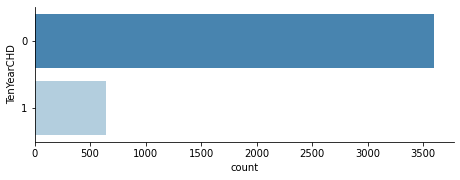

In [400]:
ax = sns.catplot(y="TenYearCHD", kind="count", data=heart, height=2.6, aspect=2.5, palette = "Blues_r")

TenYearCHD is the target variable. In the dataset, 15.2% of the patients are having the disease and 84.8% of the people are not.

## **3. Data Cleaning**

Coming to the data cleaning section it is clear that few of the columns are having null values and they are handled in the further section.

### **3.1. Finding and Handling Null values**


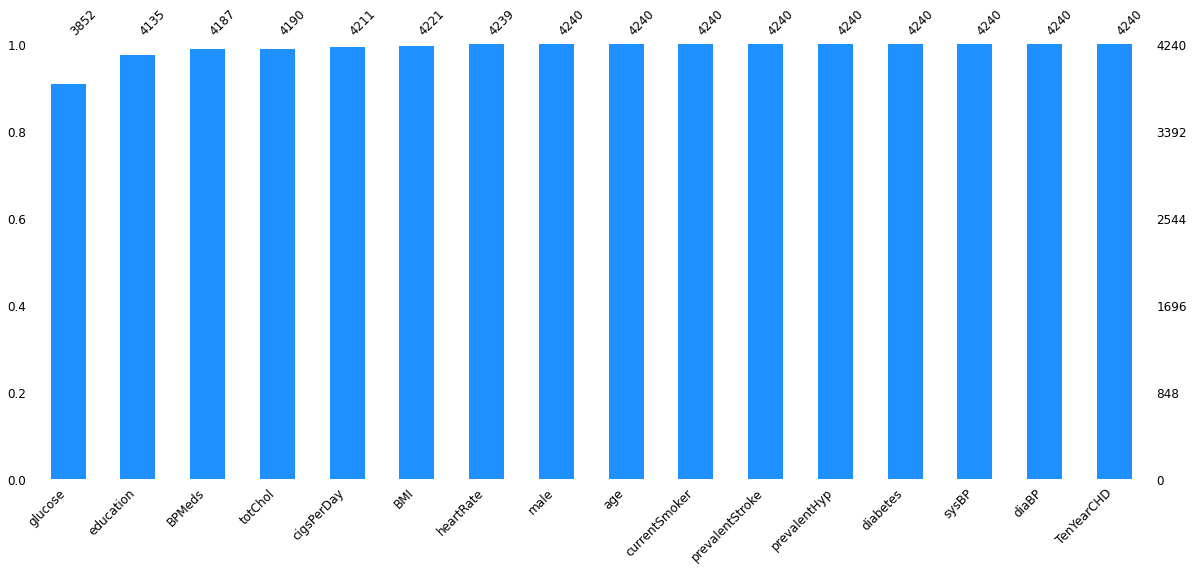

In [401]:
msno.bar(heart,color="dodgerblue", sort="ascending", figsize=(20,8), fontsize=12)

Looking at the matrix, we can say that the variables glucose, education, BPMeds, totChol, cigsperDay, BMI and HeatRate are having null values.

In [402]:
for value in ['cigsPerDay','education','BPMeds', 'totChol','BMI','glucose','heartRate']:
    heart[value].fillna(round(heart[value].mean()), inplace= True)

We do not want to delete the rows or columns containing these values since we can potentially loose a lot of other useful information for our model - We have a total of 645 rows with null values, if we delete, we will lose about 15% of our original data!

Instead, considering exchangability of the data, we will reasonably replace the null values with mean values for each respective column.

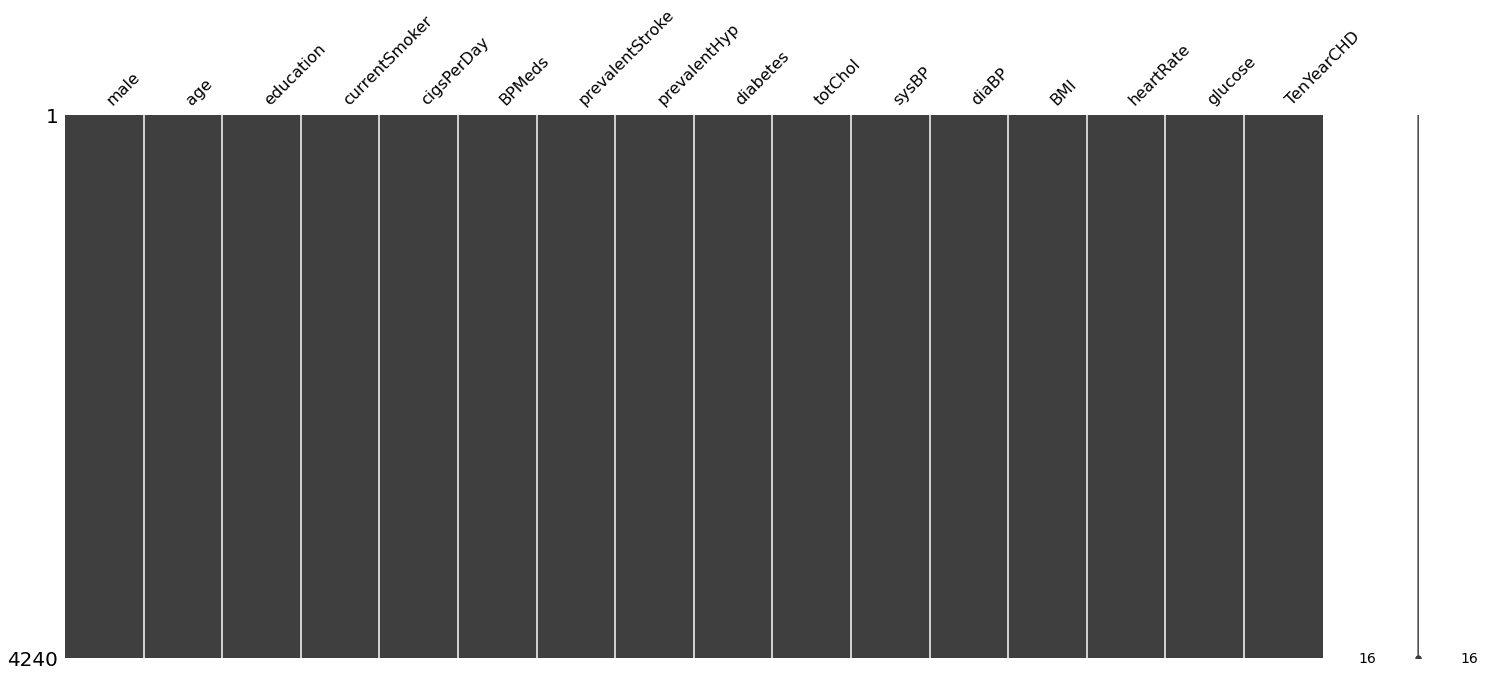

In [403]:
msno.matrix(heart);

After successfully handling the null values, the dataset looks clean.

### **3.2. Finding and Handling Outlliers**

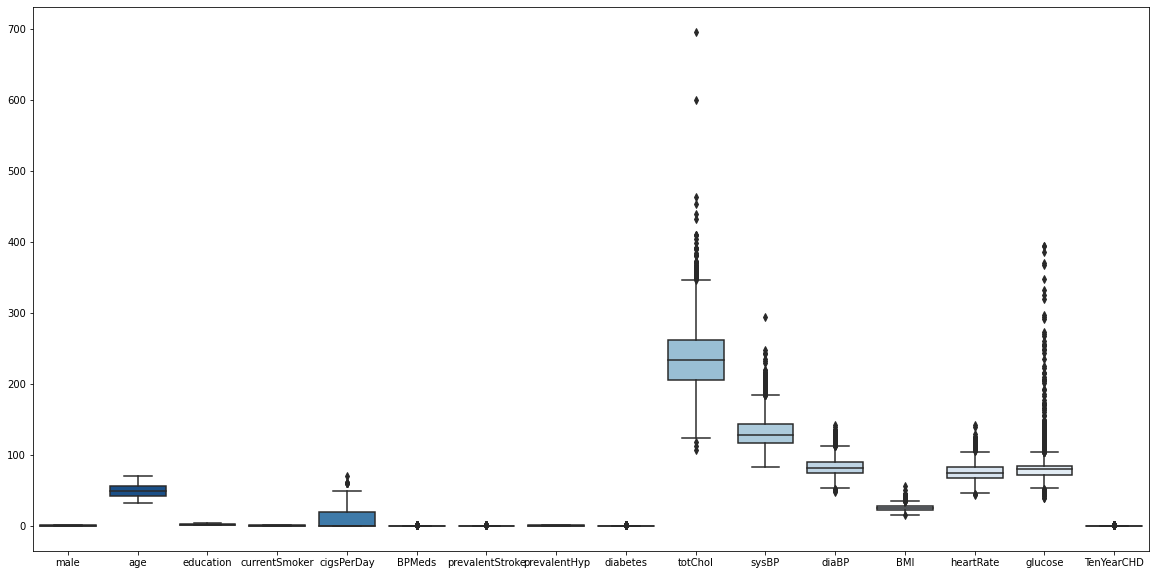

In [404]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=heart, palette = "Blues_r")
plt.show();

We have outliers in the following columns: cigsPerDay, totChol, sysBP, diaBP, BMI, heartRate, glucose

Out of them we have extremities in 'totChol' and 'sysBP' the rest of the outliers are close to the upper whisker which are considerable.

As the assumption states that there should be no outliers in our data. We will try to manipulate the data to fit in our range

In [405]:
print("the max totChol is", heart["totChol"].max())
print("the max sysBP is", heart["sysBP"].max())
print("the max diaBP is", heart["diaBP"].max())
print("the max BMI is", heart["BMI"].max())
print("the max heartRate is", heart["heartRate"].max())
print("the max glucose is", heart["glucose"].max())

the max totChol is 696.0
the max sysBP is 295.0
the max diaBP is 142.5
the max BMI is 56.8
the max heartRate is 143.0
the max glucose is 394.0


These outliers can removed by removing the data anything over 75% of the maximum value.

In [406]:
heart = heart[heart["totChol"] < 522]
heart = heart[heart["sysBP"] < 221]
heart = heart[heart["diaBP"] < 107]
heart = heart[heart["BMI"] < 43]
heart = heart[heart["heartRate"] < 107]
heart = heart[heart["glucose"] < 296]

In [407]:
heart.shape

(4001, 16)

Now, we have also dealt with the outliers. We will continuing with the dat exploration in the next section.

## **4. Data Exploration**

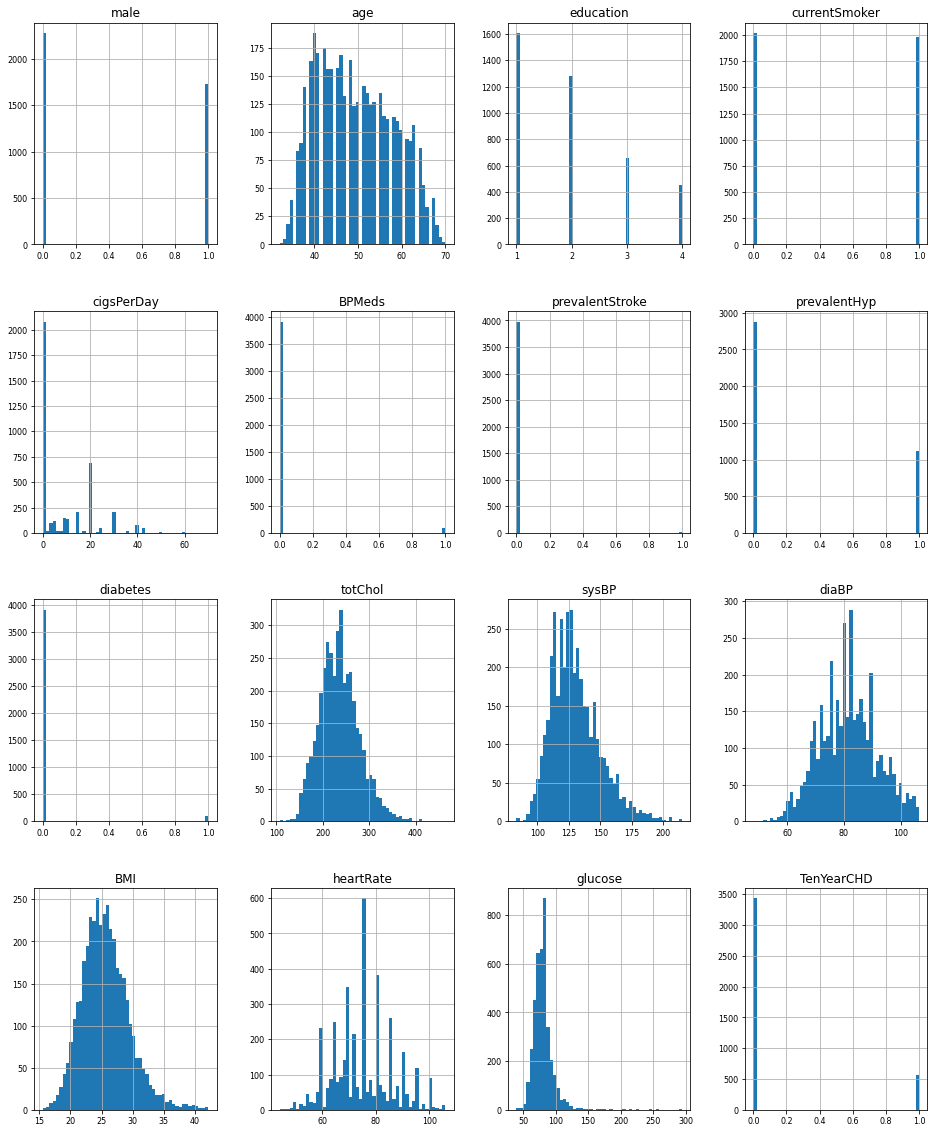

In [408]:
# Understanding numeric Distributions. 
heart.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

From the above plots we can draw certain insights:
* Most of the variables are highly skewed.

* The average BMI of the group is around 25 and the maximum number of people have a BMI between 23 to 28. This means that most of the people in the group are bordering on overweight to actually being overweight.

* Age of people in the study varies between 32 to 70 and the average age is around 50. So the people in the study are middle aged to old.

* The average number of cigerattes smoked is 9, most upto 50% of the people did not smoke at all.

* A BP of a person is written as Systolic BP / Diastolic BP. Systolic BP means the blood pressure when the heart beats. Diastolic BP means the blood pressure when the heart is resting. Average BP is 132/82 and this indicates hypertension in the patients.

* The average Glucose levels is 82 and it varies between 71 to 87 which means none of them are diabetic at the moment.

* Average heart rate is 76 with the maximum number of people between 68 to 83. An outlier has a heart rate of 143.

* Most people have a cholesterol levels of 206 to 263, with average being 237. This indicates Borderline high to high cholesterol level.

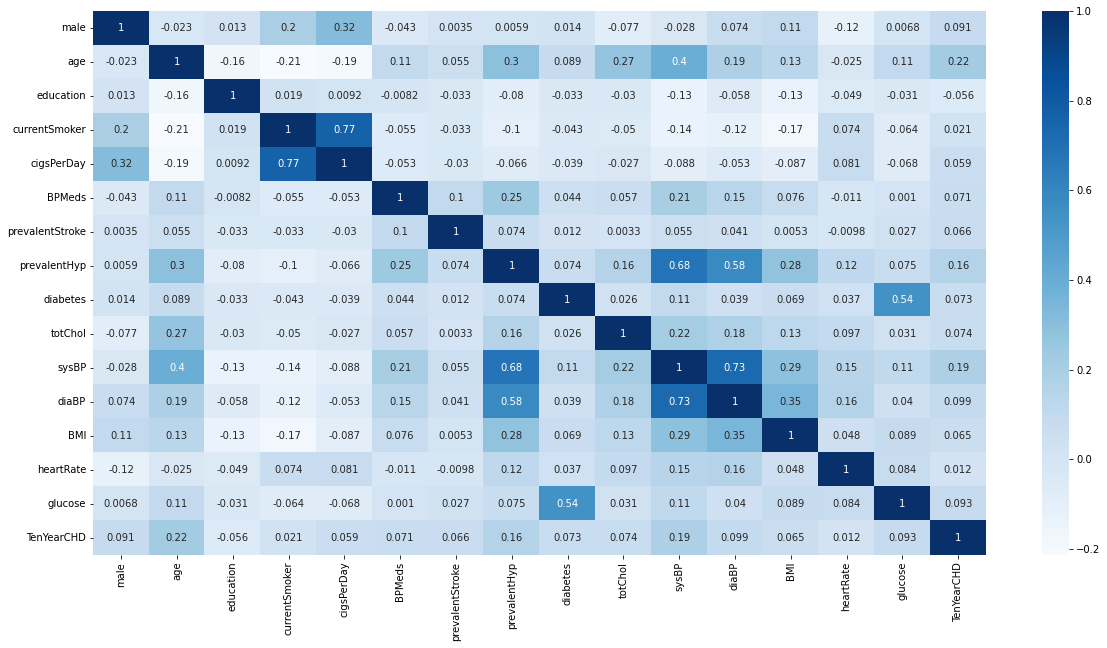

In [409]:
data  = heart.corr()
plt.figure(figsize = (20,10))
sns.heatmap(data, cmap="Blues", annot = True);

From the above correlation, it is even that:

* Systolic BP & Diastolic BP are highly correlated to each other.

* Systolic BP & Diastolic BP each are mildly correlated to BMI (Body Mass Index).

* Systolic BP & Age are mildly correlated to each other.

* Prevalent Hp is  higly correlated to Systolic BP & Diastolic BP.

* Compared to all the independent data, the correlation coefficient between education and and target variable TenYearCHD is very low and actually negative.

* For the rest the larger the number and darker the colour the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares


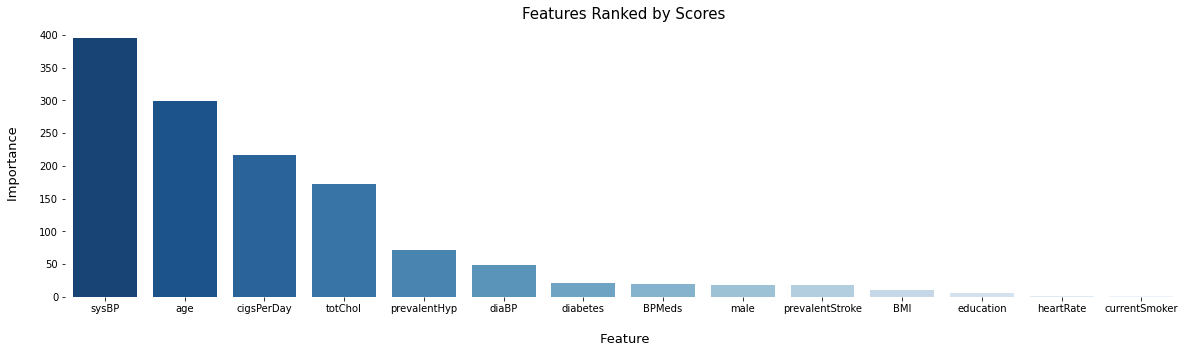

In [410]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# separate the independent columns
x = heart.iloc[:, 0:14]

# separate the dependent column
y = heart.iloc[:, 15]

# Using SelectKBest to extract top 10 features
from sklearn.feature_selection import SelectKBest
topfeatures = SelectKBest(score_func = chi2, k = 10)
fit = topfeatures.fit(x, y)
xyscore = pd.DataFrame(fit.scores_)
xycolumn = pd.DataFrame(x.columns)

featurescore = pd.concat([xycolumn, xyscore], axis = 1)

# rename columns featurescore dataframe
featurescore.columns = ["Feature", "Score"]

featurescore = featurescore.sort_values(by = "Score", ascending= False)

plt.figure(figsize= (20,5))
sns.barplot(x = "Feature", y = "Score", data = featurescore, palette = "Blues_r")
plt.box(False)
plt.title("Features Ranked by Scores", fontsize = 15)
plt.xlabel("\n Feature", fontsize = 13)
plt.ylabel("Importance \n", fontsize = 13)
plt.xticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.show()

We have 16 variables in the datset and without domain knowledge its hard to focus on the significant variables. Therefore, ran this small machine learning model for feature selection in order to focus on the most important variables in the dataset. After running the model, the top feature are sysBP, Age, cigsPerDay, totChol and prevalentHyp.

### **4.1. Grouping and Aggregations**

In [411]:
df1 = heart.pivot_table(values='cigsPerDay', index='male', columns='TenYearCHD', aggfunc='count', sort = True)
df1

TenYearCHD,0,1
male,,
0,2015,261
1,1417,308


In [412]:
df2 = heart.pivot_table(values='diabetes', index='male', columns='TenYearCHD', aggfunc='count', sort = True)
df2

TenYearCHD,0,1
male,,
0,2015,261
1,1417,308


In [413]:
df3 = heart.pivot_table(values='cigsPerDay', index=['education','male'], columns='TenYearCHD', aggfunc='count', sort = True)
df3

TenYearCHD        0    1
education male          
1.0       0     740  135
          1     581  151
2.0       0     697   70
          1     443   75
3.0       0     402   43
          1     179   32
4.0       0     176   13
          1     214   50

In [414]:
df4 = heart.groupby(['TenYearCHD','prevalentHyp']).agg({'diaBP':'mean', 'sysBP':'mean'})
df4.head()

diaBP       sysBP
TenYearCHD prevalentHyp                       
0          0             77.769665  121.522780
           1             91.190972  149.778935
1          0             78.728296  125.118971
           1             90.375969  155.521318

In [415]:
df5 = heart.pivot_table(values='totChol', index='currentSmoker', columns='TenYearCHD', aggfunc='count', sort = True)
df5

TenYearCHD,0,1
currentSmoker,,
0,1745,272
1,1687,297


In [416]:
df6=heart.groupby("TenYearCHD", as_index=False)['sysBP','diaBP'].mean()
df6

<ipython-input-416-9b0e72b882b5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df6=heart.groupby("TenYearCHD", as_index=False)['sysBP','diaBP'].mean()


,TenYearCHD,sysBP,diaBP
0,0,128.636218,81.148456
1,1,138.904218,84.009666


From the above grouping and aggregation we can tell that:

*   A patient who is having more cigareted per day and is a male, is tend to have the disease
*   With respect to Diabetes, males are having the disease compared to the females. Also, if the patient is female and does not have diabeted there are chances that the person might not have the disease.
- The patient who is having more cigarettes per day and the education level is less and also if the patient is a male, there are high chances that they have the disease.
- The patient with high bp i.e. the sysBP and diaBP, the chances of the patient having the disease is high.
- If the patient is having high cholestrol and if he/she is a smoker, that particular patient is having the disease.
- If the sysBP and the DiaBP are high, the patient will be having the disease.





### **4.2. Visualizations**

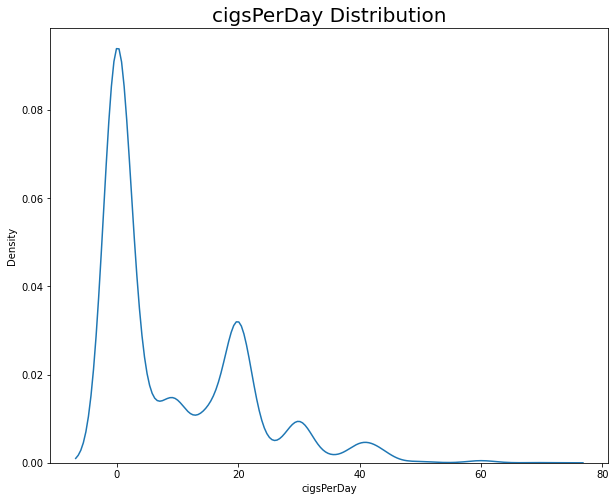

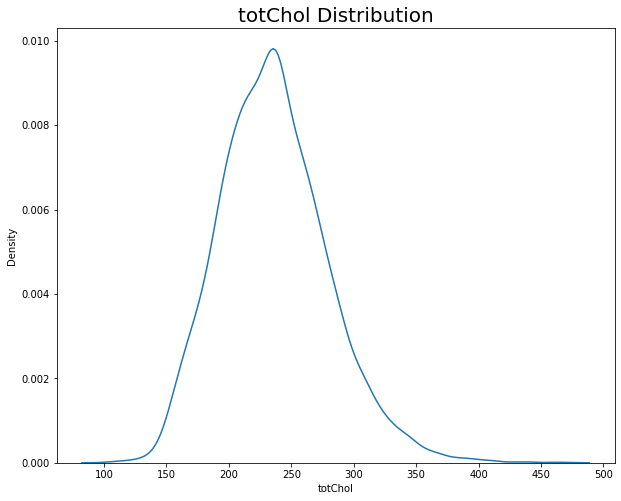

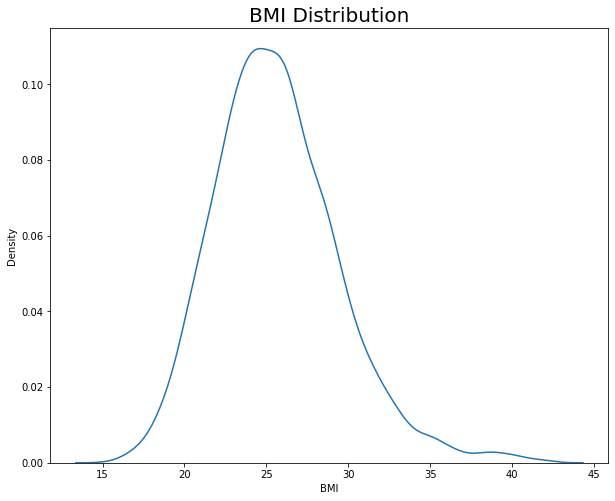

In [417]:
numeric_features = ['cigsPerDay', 'totChol','BMI']
for feature in numeric_features:
    plt.figure(figsize=(10, 8), facecolor='w')
    sns.kdeplot(heart[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show();

From the above distributions we can say that, totChol and BMI has an uniform distribution.

CigsPerDay has a highly uneven distribution with the most data present in 0

CigsPerDay and sysBP shows quite a bit and slight right skewness respectively.

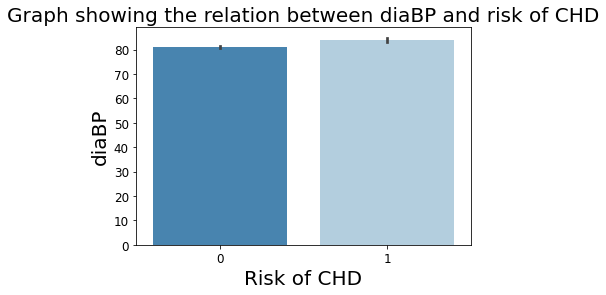

In [418]:
sns.barplot(x=heart["TenYearCHD"], y=heart["diaBP"], palette = "Blues_r")
plt.title("Graph showing the relation between diaBP and risk of CHD", size=20)
plt.xlabel("Risk of CHD", size=20)
plt.ylabel("diaBP", size=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show();

Minor relation found between higher risk of TenYearCHD with higher diaBP similar to the previous one
Majority of people with diaBP ranging upto 80.0 has lower chance of contracting the disease.

(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 8 Text major ticklabel objects>)

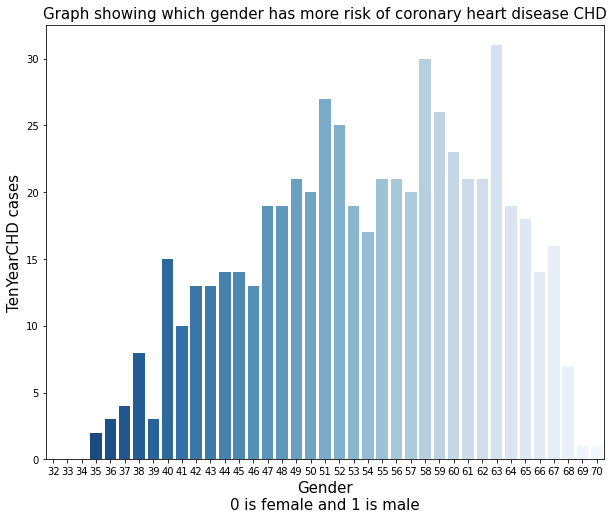

In [419]:
graph_2 = heart.groupby("age", as_index=False).TenYearCHD.sum()
#Ploting the above values
plt.figure(figsize=(10,8), facecolor='w')
sns.barplot(x=graph_2["age"], y=graph_2["TenYearCHD"], palette = "Blues_r")
plt.title("Graph showing which gender has more risk of coronary heart disease CHD", size=15)
plt.xlabel("Gender\n0 is female and 1 is male",size=15)
plt.ylabel("TenYearCHD cases", size=15)
plt.xticks(size=10)
plt.yticks(size=10)

According to this dataset, males have shown a slighly higher risk of coronary heart disease TenYearCHD.

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 8 Text major ticklabel objects>)

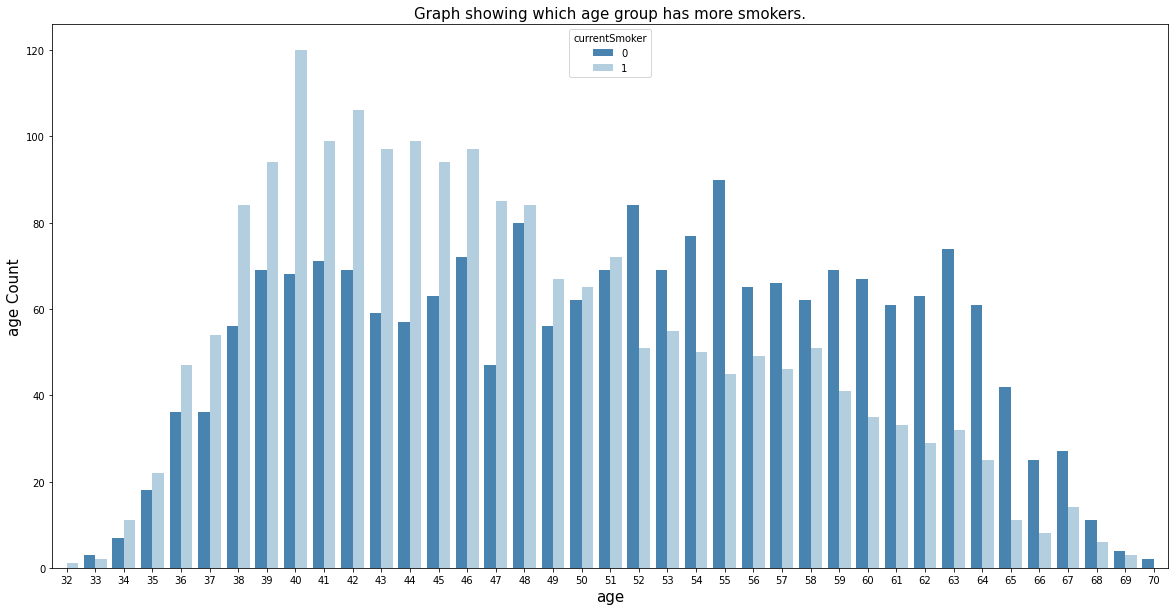

In [420]:
plt.figure(figsize=(20,10), facecolor='w')
sns.countplot(x="age",data=heart,hue="currentSmoker", palette = "Blues_r")
plt.title("Graph showing which age group has more smokers.", size=15)
plt.xlabel("age", size=15)
plt.ylabel("age Count", size=15)
plt.xticks(size=10)
plt.yticks(size=10)

It is evident from the above graph that Mid-age groups ranging from the age of 38 - 46 have more number of currentSmokers and also No currentSmokers observed below the age of 32 and maximum age for a currentSmokers is 70.

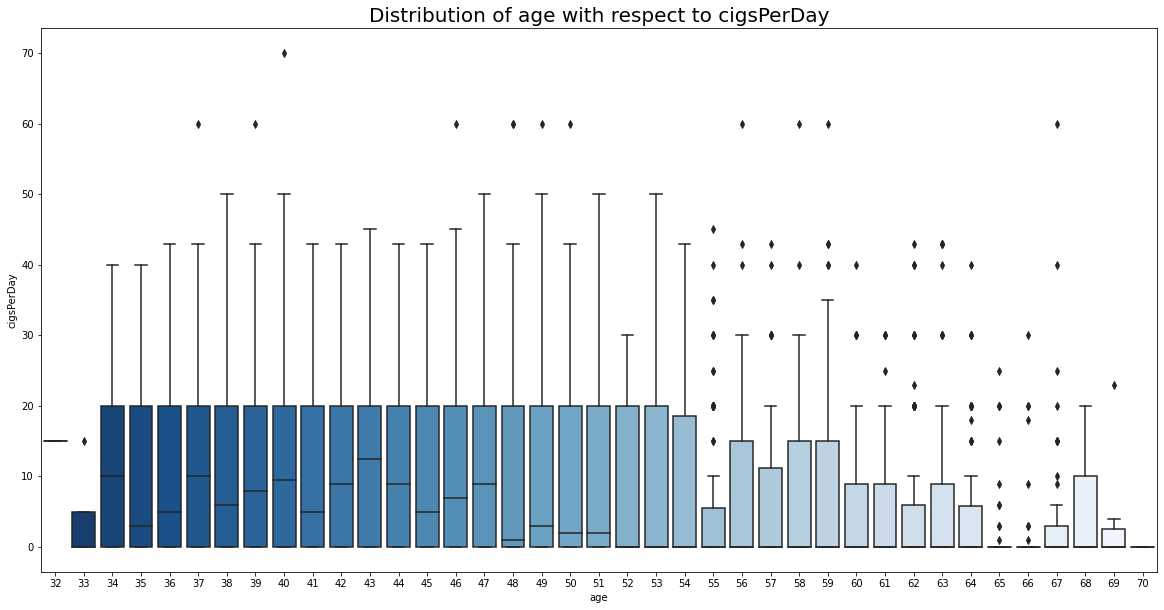

In [421]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(x="age",y="cigsPerDay",data=heart, palette = "Blues_r")
plt.title("Distribution of age with respect to cigsPerDay", size=20)
plt.show();

We can observe that cigsPerDay has a fairly parallel relationship with age. Most of the patients either smoke 2-3 cigsperDay or not cigs at all.

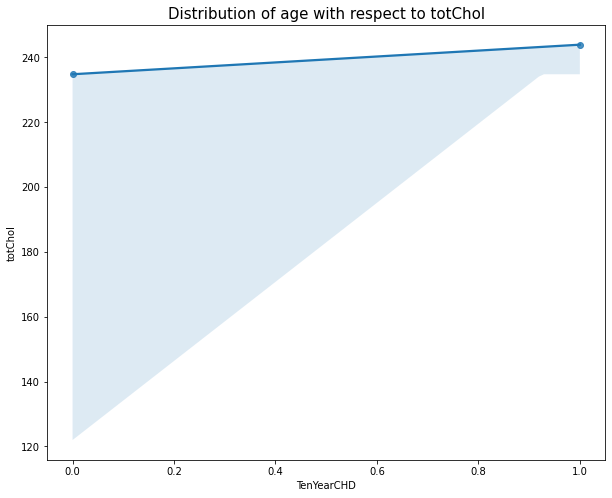

In [422]:
graph_5 = heart.groupby("TenYearCHD", as_index=False).totChol.mean()
plt.figure(figsize=(10,8), facecolor='w')
sns.regplot(x=graph_5["TenYearCHD"], y=graph_5["totChol"])
plt.title("Distribution of age with respect to totChol", size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show();

From the above graph, we can say that the aged people have more cholesterol.

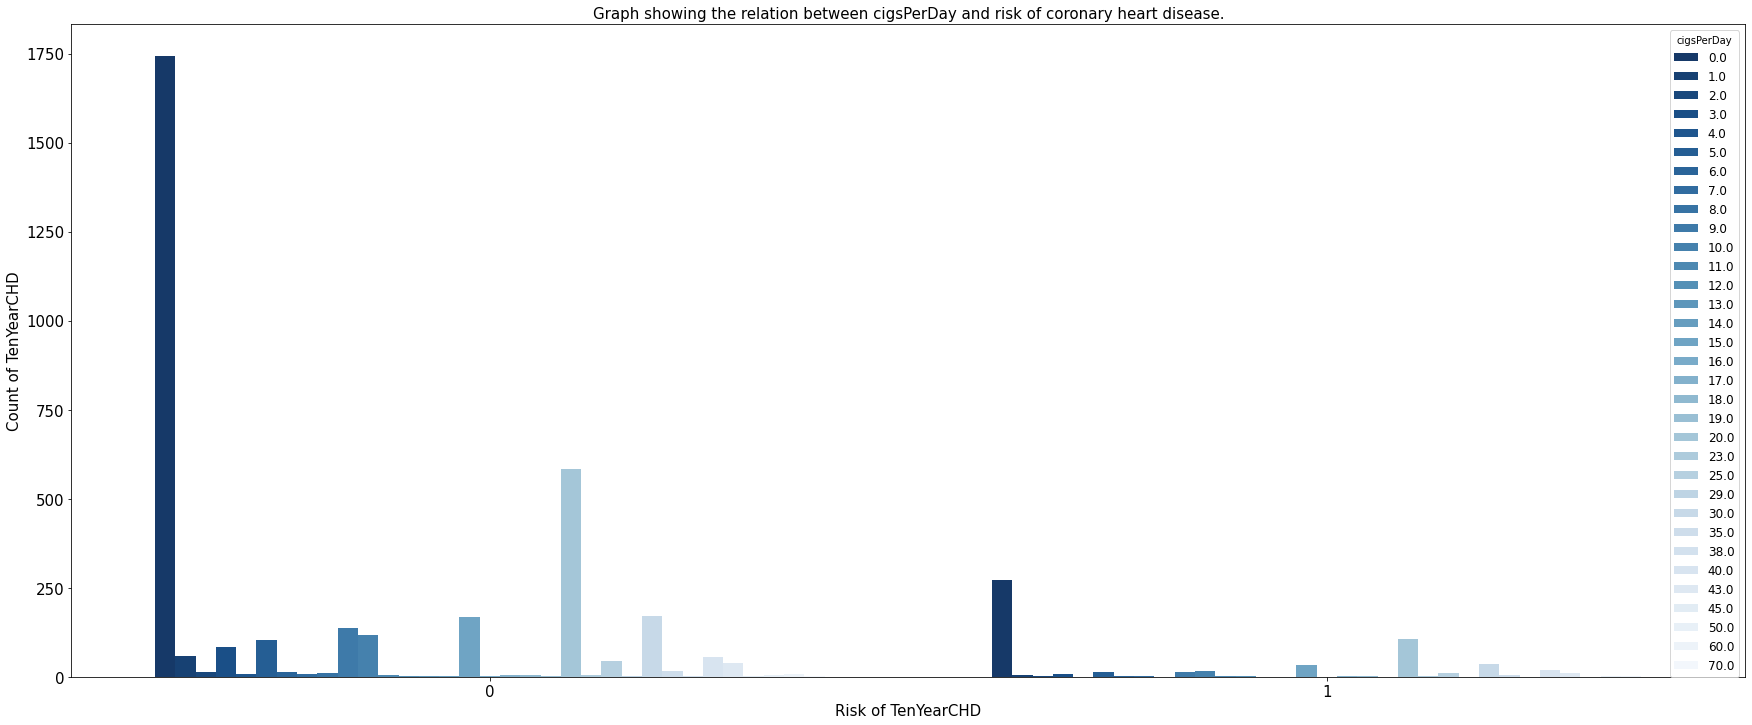

In [423]:
#Relation between cigsPerDay and risk of coronary heart disease.
plt.figure(figsize=(30,12), facecolor='w')
sns.countplot(x="TenYearCHD",data=heart,hue="cigsPerDay", palette = "Blues_r")
plt.legend(title='cigsPerDay', fontsize='large')
plt.title("Graph showing the relation between cigsPerDay and risk of coronary heart disease.", size=15)
plt.xlabel("Risk of TenYearCHD", size=15)
plt.ylabel("Count of TenYearCHD", size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show();

If a patient has less number of cigsPerDay the risk of CHD reduces.

Those who don't smoke, i.e., with a cigsPerDay of 0.0 has a really low risk of contracting the disease

Although that is the case, low cigsPerDay doesn't actually guarantee a much lower risk of CHD

## **5. Conclusion**

Although the analysis will be done irrespective of the domain knowledge, there might be a possiblity that we might have missed some variables. Therefore, the key here is to create a model that gives us the top variables which are actually related to the target variables. After all the exploratory data analysis, we have found that variables such as cigsPerDay, diaBP, sysBP, totChol have a lot of impact on the risk of CHD. If any of the variable is high, there might be a chance that the patient is prone to CHD apart from the hypothetial cases.